In [158]:
import pandas as pd
df = pd.read_csv("C:\catastrophic.csv")
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 54 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 403 non-null    int64 
 1   Gender                              403 non-null    object
 2   Marital Status                      403 non-null    object
 3   Education Level                     403 non-null    object
 4   Employment Status                   403 non-null    object
 5   Religion                            403 non-null    object
 6   Ethnic Group                        403 non-null    object
 7   Geo Zone                            403 non-null    object
 8   Children in Household?              403 non-null    object
 9   Older Person in Household?          403 non-null    object
 10  Use Insecticide Net?                403 non-null    object
 11  Residence Type                      403 non-null    object

(   Age  Gender Marital Status Education Level Employment Status  Religion  \
 0   37    Male        Married        Tertiary          Employed     Islam   
 1   36    Male        Married        Tertiary          Unemploy  Christia   
 2   42    Male        Married        Tertiary          Employed  Christia   
 3   32  Female        Married        Tertiary          Employed     Islam   
 4   47    Male        Married        Tertiary          Employed  Christia   
 
   Ethnic Group      Geo Zone Children in Household?  \
 0        Ebira     Kogi East                    Yes   
 1        Igala     Kogi West                    Yes   
 2       Others     Kogi West                    Yes   
 3        Igala  Kogi Central                    Yes   
 4        Igala     Kogi West                    Yes   
 
   Older Person in Household?  ... Suspended Projects for Bills?  \
 0                         No  ...                            No   
 1                        Yes  ...                      

In [160]:
df.describe()

,Age,Household Head Age
count,403.000000,403.000000
mean,38.263027,52.769231
std,10.472912,14.210705
min,21.000000,30.000000
25%,30.000000,41.000000
50%,37.000000,54.000000
75%,47.000000,63.000000
max,59.000000,100.000000


In [162]:
# Data Cleaning

# Remove any non-numeric characters from numerical columns and convert them to float
columns_to_clean = ['Household Income', 'Monthly Health Spending', 'Last Admission Cost?', 
                    '6-Month Health Spending Estimate']

for col in columns_to_clean:
    df[col] = df[col].replace(r'[^0-9.]', '', regex=True).replace('', None).astype(float)

# Checking for missing values
missing_values = df.isnull().sum()

# Clean column names by removing leading/trailing whitespace and replacing spaces with underscores
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('?', '', regex=False)

# Display cleaned data info
df.info(), missing_values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 54 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                403 non-null    int64  
 1   Gender                             403 non-null    object 
 2   Marital_Status                     403 non-null    object 
 3   Education_Level                    403 non-null    object 
 4   Employment_Status                  403 non-null    object 
 5   Religion                           403 non-null    object 
 6   Ethnic_Group                       403 non-null    object 
 7   Geo_Zone                           403 non-null    object 
 8   Children_in_Household              403 non-null    object 
 9   Older_Person_in_Household          403 non-null    object 
 10  Use_Insecticide_Net                403 non-null    object 
 11  Residence_Type                     403 non-null    object 

(None,
 Age                                    0
 Gender                                 0
 Marital Status                         0
 Education Level                        0
 Employment Status                      0
 Religion                               0
 Ethnic Group                           0
 Geo Zone                               0
 Children in Household?                 0
 Older Person in Household?             0
 Use Insecticide Net?                   0
 Residence Type                         0
 Household Head Gender                  0
 Household Head Age                     0
 Household Head Education              17
 Household Head Employment              0
 Household Head Marital Status          0
 Household Income                       0
 Health Facility Type                   0
 Access to Govt Healthcare?             0
 Can Afford Govt Healthcare?            0
 Can Afford Private Healthcare?         0
 Health Cost Bearer                     0
 Distance to Facility      

In [164]:
# Descriptive statistics for numeric columns
numeric_stats = df.describe()

# Frequency distribution for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_distributions = {col: df[col].value_counts() for col in categorical_columns}

numeric_stats, categorical_distributions

(              Age  Household_Head_Age  Household_Income  \
 count  403.000000          403.000000      4.030000e+02   
 mean    38.263027           52.769231      1.724078e+10   
 std     10.472912           14.210705      2.342065e+10   
 min     21.000000           30.000000      2.000000e+04   
 25%     30.000000           41.000000      1.000000e+05   
 50%     37.000000           54.000000      2.000050e+09   
 75%     47.000000           63.000000      5.000010e+10   
 max     59.000000          100.000000      5.000010e+10   
 
        Monthly_Health_Spending  Last_Admission_Cost  \
 count             4.030000e+02         3.630000e+02   
 mean              8.307740e+09         5.641804e+04   
 std               1.798854e+10         1.315800e+05   
 min               2.000000e+04         2.000000e+02   
 25%               2.000000e+04         1.000000e+04   
 50%               2.000000e+04         2.500000e+04   
 75%               2.000050e+09         5.000000e+04   
 max      

Proportion of respondents with CHE (proxy): 14.64%


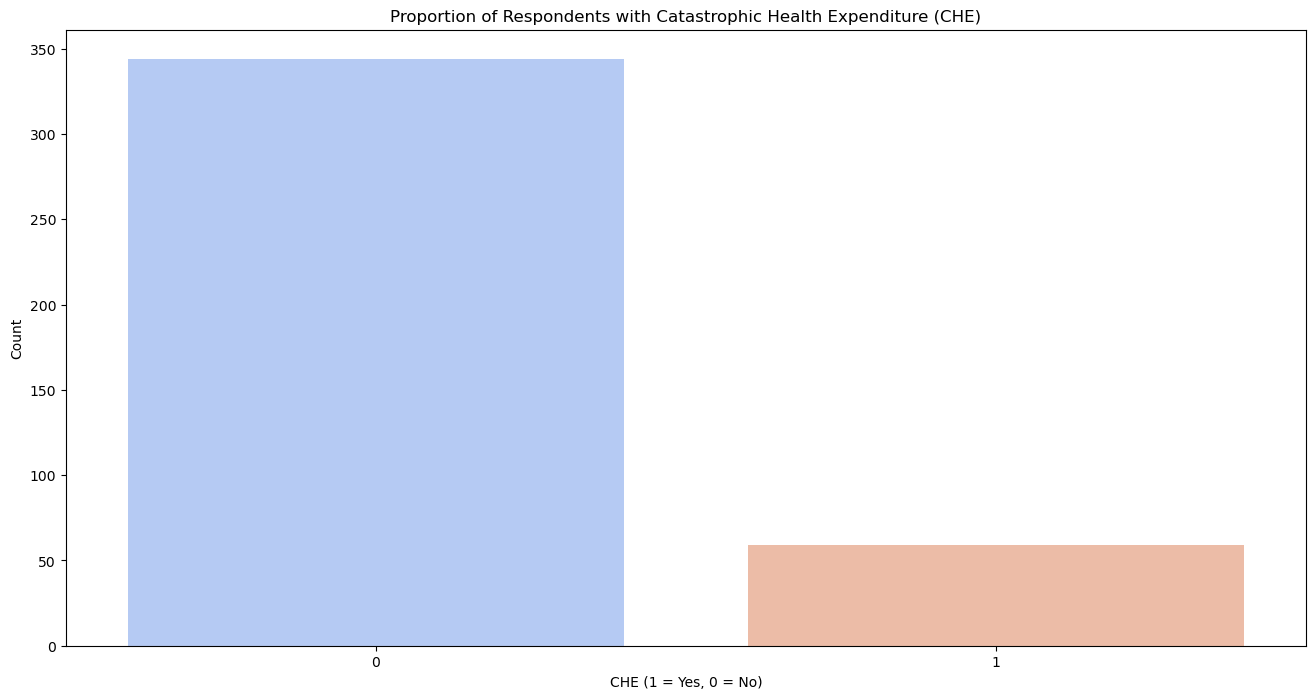

In [184]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the "unpaid_medical_bills" column exists
if "unpaid_medical_bills" in df.columns:
    # Create a proxy outcome variable for CHE based on "unpaid_medical_bills"
    df['che'] = df['unpaid_medical_bills'].str.strip().str.lower().apply(lambda x: 1 if x == 'yes' else 0)

    # Calculate the proportion of respondents with CHE
    proportion_che = df['che'].mean()
    print(f"Proportion of respondents with CHE (proxy): {proportion_che:.2%}")

    # Visualize the CHE distribution
    plt.figure(figsize=(16, 8))
    sns.countplot(x="che", data=df, palette="coolwarm")
    plt.title("Proportion of Respondents with Catastrophic Health Expenditure (CHE)")
    plt.xlabel("CHE (1 = Yes, 0 = No)")
    plt.ylabel("Count")
    plt.show()
else:
    print("The column 'unpaid_medical_bills' does not exist in the DataFrame.")

In [186]:
import pandas as pd

# Standardize column names for consistency
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('?', '', regex=False)

# Identify numeric variables (e.g., age, household_head_age)
numeric_vars = ["age", "household_head_age"]

# Calculate summary statistics for households with and without CHE
desc_stats = df.groupby("che")[numeric_vars].describe()
print("Descriptive Statistics by CHE Status:")
print(desc_stats)

# Define categorical variables for cross-tabulation
cat_vars = ["employment_status", "residence_type", "health_insurance_status", "geo_zone"]

# Display frequency tables by CHE status for each categorical variable
for var in cat_vars:
    if var in df.columns:
        print(f"\nCross-tabulation of {var} by CHE status:")
        print(pd.crosstab(df[var], df['che']))
    else:
        print(f"Warning: The variable '{var}' is not present in the DataFrame.")

Descriptive Statistics by CHE Status:
       age                                                      \
     count       mean        std   min   25%   50%   75%   max   
che                                                              
0    344.0  36.828488  10.052759  21.0  30.0  35.0  43.0  59.0   
1     59.0  46.627119   8.899629  29.0  40.0  50.0  54.0  58.0   

    household_head_age                                                       
                 count       mean        std   min   25%   50%   75%    max  
che                                                                          
0                344.0  52.625000  14.810034  30.0  40.0  50.0  63.0  100.0  
1                 59.0  53.610169  10.085867  31.0  45.0  54.0  63.0   70.0  

Cross-tabulation of employment_status by CHE status:
che                  0   1
employment_status         
Employed           250  57
Unemploy            94   2

Cross-tabulation of residence_type by CHE status:
che               0   1
resi

In [188]:
import statsmodels.formula.api as smf
from sklearn.metrics import classification_report, confusion_matrix

# Define the logistic regression formula.
# The categorical variables are wrapped in C() to ensure they are properly handled.
formula = ("che ~ age + household_head_age + C(employment_status) + C(residence_type) + " 
           "C(health_insurance_status) + C(geo_zone)")

# Fit the logistic regression model on the full dataset.
model = smf.logit(formula=formula, data=df).fit(disp=False)
print(model.summary())

# Predict the probability of CHE for each observation.
df['che_pred_prob'] = model.predict(df)

# Classify observations as CHE (1) if the predicted probability exceeds 0.5, else 0.
df['che_pred'] = (df['che_pred_prob'] > 0.5).astype(int)

# Evaluate the model performance using a confusion matrix and a classification report.
print("Confusion Matrix:")
print(confusion_matrix(df['che'], df['che_pred']))
print("\nClassification Report:")
print(classification_report(df['che'], df['che_pred']))

                           Logit Regression Results                           
Dep. Variable:                    che   No. Observations:                  403
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            8
Date:                Sun, 09 Feb 2025   Pseudo R-squ.:                  0.2741
Time:                        22:00:32   Log-Likelihood:                -121.82
converged:                       True   LL-Null:                       -167.82
Covariance Type:            nonrobust   LLR p-value:                 1.826e-16
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                    -6.4151      1.099     -5.837      0.000      -8.569      -4.261
C(employment_status)[T.Unemploy]      

In [190]:
from scipy.stats import chi2_contingency
import pandas as pd

# Ensure the DataFrame column names are standardized
# (e.g., 'employment_status' and 'geo_zone' are available)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('?', '', regex=False)

# Hypothesis i: Employment Status vs. CHE
emp_table = pd.crosstab(df['employment_status'], df['che'])
chi2_emp, p_emp, dof_emp, ex_emp = chi2_contingency(emp_table)
print("Chi-square test for Employment Status vs. CHE")
print(f"Chi2 Statistic: {chi2_emp:.2f}, Degrees of Freedom: {dof_emp}, p-value: {p_emp:.4f}")

# Hypothesis iii: Geo Zone (Location) vs. CHE
geo_table = pd.crosstab(df['geo_zone'], df['che'])
chi2_geo, p_geo, dof_geo, ex_geo = chi2_contingency(geo_table)
print("\nChi-square test for Geo Zone vs. CHE")
print(f"Chi2 Statistic: {chi2_geo:.2f}, Degrees of Freedom: {dof_geo}, p-value: {p_geo:.4f}")

Chi-square test for Employment Status vs. CHE
Chi2 Statistic: 14.61, Degrees of Freedom: 1, p-value: 0.0001

Chi-square test for Geo Zone vs. CHE
Chi2 Statistic: 2.46, Degrees of Freedom: 2, p-value: 0.2930


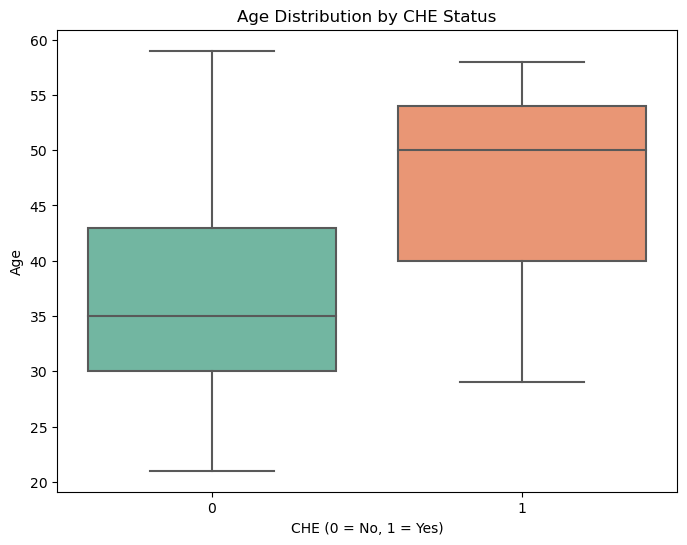

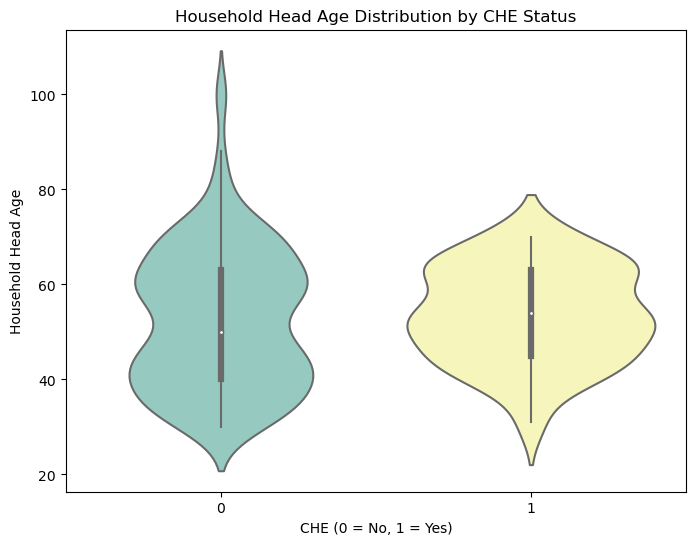

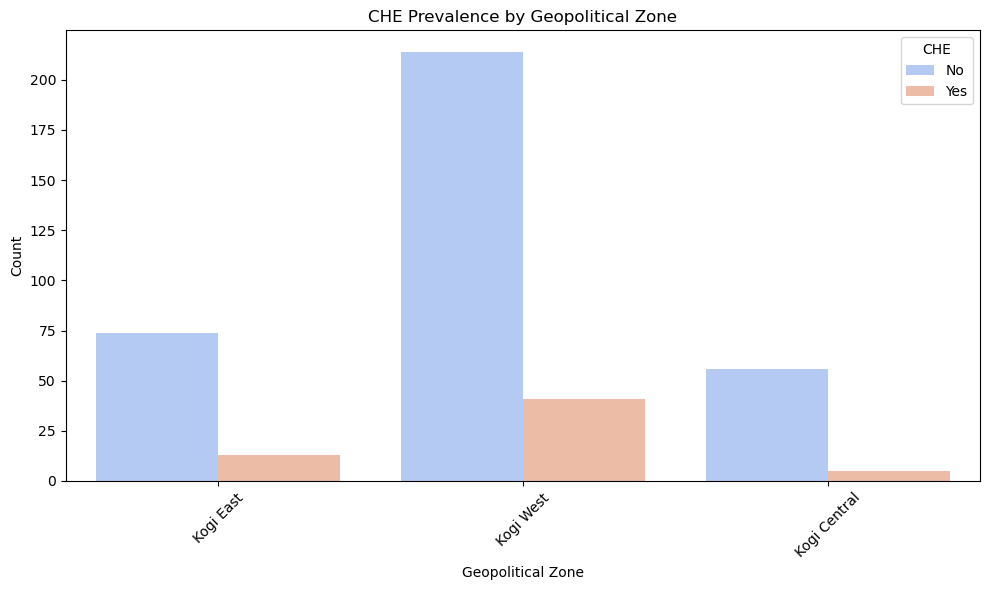

In [192]:
# Box plot for age distribution by CHE status
plt.figure(figsize=(8, 6))
sns.boxplot(x="che", y="age", data=df, palette="Set2")
plt.title("Age Distribution by CHE Status")
plt.xlabel("CHE (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()

# Violin plot for household head age by CHE status
plt.figure(figsize=(8, 6))
sns.violinplot(x="che", y="household_head_age", data=df, palette="Set3")
plt.title("Household Head Age Distribution by CHE Status")
plt.xlabel("CHE (0 = No, 1 = Yes)")
plt.ylabel("Household Head Age")
plt.show()

# Socioeconomic analysis: CHE proportions by geo_zone
plt.figure(figsize=(10, 6))
sns.countplot(x="geo_zone", hue="che", data=df, palette="coolwarm")
plt.title("CHE Prevalence by Geopolitical Zone")
plt.xlabel("Geopolitical Zone")
plt.ylabel("Count")
plt.legend(title="CHE", labels=["No", "Yes"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
### Threshold Analysis Using ROC Curve
Here we compute a continuous variable, che_ratio (defined as monthly health spending divided by household income). We then compare this continuous measure against our binary CHE indicator (for example, defined based on unpaid medical bills or an externally defined threshold) and determine the optimal threshold using ROC analysis and the Youden Index.

Area Under ROC Curve: 0.436
Optimal CHE Ratio Threshold: 1.0000


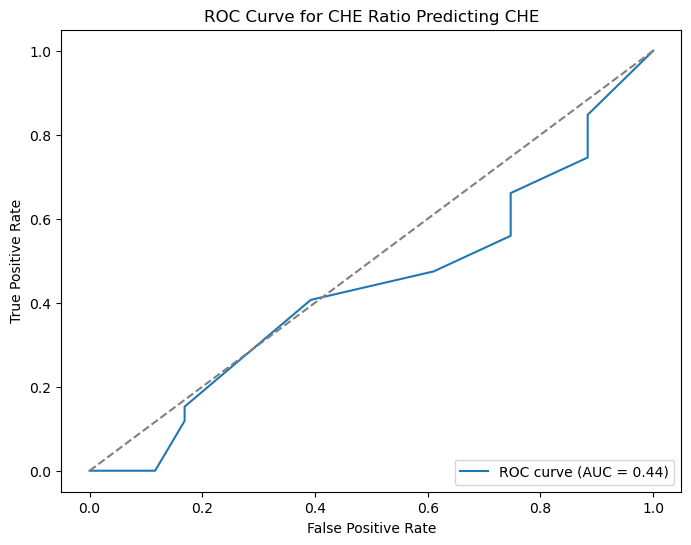

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score

# Standardize column names for ease of reference
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('?', '', regex=False)

# For this analysis, assume that financial columns are clean (if not, apply cleaning as needed).
# Compute a continuous CHE ratio: monthly_health_spending / household_income.
# (Note: Ensure that household_income and monthly_health_spending are in numeric format; here we assume they are already cleaned)
df['che_ratio'] = df['monthly_health_spending'] / df['household_income']

# Create a binary CHE indicator.
# Here, as a proxy, we define CHE based on unpaid_medical_bills ('yes' = 1, else 0)
df['che'] = df['unpaid_medical_bills'].str.strip().str.lower().apply(lambda x: 1 if x == 'yes' else 0)

# Drop rows with missing values in che_ratio or che
df_ratio = df.dropna(subset=['che_ratio', 'che'])

# Compute ROC curve: Use che_ratio as the continuous predictor for CHE
fpr, tpr, thresholds = roc_curve(df_ratio['che'], df_ratio['che_ratio'])
auc_value = roc_auc_score(df_ratio['che'], df_ratio['che_ratio'])
print(f"Area Under ROC Curve: {auc_value:.3f}")

# Determine the optimal threshold using the Youden Index (tpr - fpr)
youden_index = tpr - fpr
optimal_threshold = thresholds[np.argmax(youden_index)]
print(f"Optimal CHE Ratio Threshold: {optimal_threshold:.4f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_value:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for CHE Ratio Predicting CHE')
plt.legend(loc="lower right")
plt.show()

In [ ]:
### Multivariate Logistic Regression (with Interaction Terms)
We now build a logistic regression model to estimate the probability of a household experiencing CHE. Using the statsmodels formula interface, we include continuous predictors (age, household head age, che_ratio) and categorical predictors (employment_status, residence_type, health_insurance_status, geo_zone). We also include an interaction between employment status and health insurance status, for example.

In [84]:
import statsmodels.formula.api as smf

# Ensure categorical variables are treated as such via C()
# Note: Adjust variable names if needed (our standardized names are lowercase with underscores)
formula = (
    "che ~ age + household_head_age + che_ratio + "
    "C(employment_status) + C(residence_type) + C(health_insurance_status) + C(geo_zone) + "
    "C(employment_status):C(health_insurance_status)"
)

# Fit the logistic regression model
logit_model = smf.logit(formula=formula, data=df_ratio).fit(disp=False)
print(logit_model.summary())

# Predicted probabilities and binary predictions (threshold = 0.5)
df_ratio['che_pred_prob'] = logit_model.predict(df_ratio)
df_ratio['che_pred'] = (df_ratio['che_pred_prob'] > 0.5).astype(int)

# Evaluate classification performance
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(df_ratio['che'], df_ratio['che_pred']))
print("\nClassification Report:")
print(classification_report(df_ratio['che'], df_ratio['che_pred']))

C:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:                    che   No. Observations:                  403
Model:                          Logit   Df Residuals:                      392
Method:                           MLE   Df Model:                           10
Date:                Sun, 09 Feb 2025   Pseudo R-squ.:                  0.3179
Time:                        18:07:01   Log-Likelihood:                -114.46
converged:                      False   LL-Null:                       -167.82
Covariance Type:            nonrobust   LLR p-value:                 2.456e-18
                                                                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                     -6.9

In [ ]:
### Cluster Analysis (K-Means)
To explore heterogeneity among households, we perform a clustering analysis. We select key continuous variables—such as age, household_head_age, household_income, monthly_health_spending, and che_ratio—and apply standardization followed by K-Means clustering. The goal is to identify distinct groups of households that share similar characteristics and possibly different vulnerabilities regarding CHE.

C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Cluster Centers (Original Scale):
         age  household_head_age  household_income  monthly_health_spending  \
0  38.191489           52.429787      6.298613e+08             8.255698e+08   
1  38.058824           54.632353      5.000010e+10             1.142652e+10   
2  39.656250           47.343750      1.000000e+05             5.000010e+10   

       che_ratio  
0    5532.601275  
1       0.228530  
2  500001.000000  

Cluster counts:
cluster
0    235
1    136
2     32
Name: count, dtype: int64


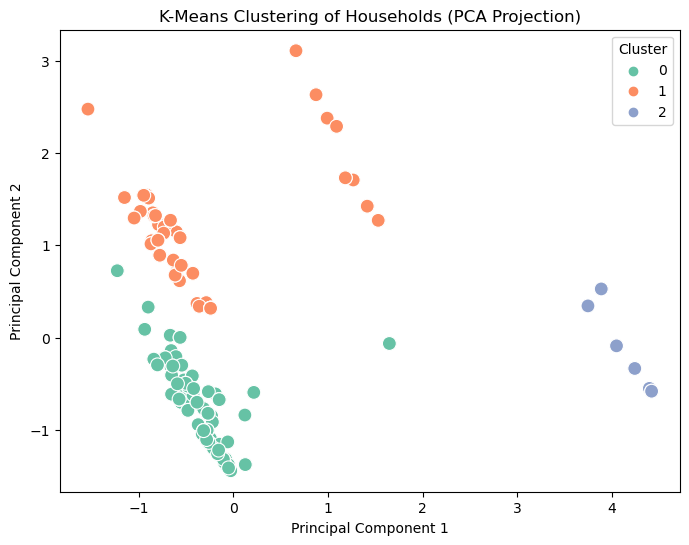

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize column names for consistency
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('?', '', regex=False)

# Define the continuous variables for clustering
cluster_vars = ["age", "household_head_age", "household_income", "monthly_health_spending", "che_ratio"]

# Ensure the required variables exist and drop rows with missing values in these columns
df_cluster = df.dropna(subset=cluster_vars).copy()
if df_cluster.empty:
    raise ValueError("No data available for clustering after dropping missing values. Consider using imputation methods or alternative proxies.")

# Standardize the selected variables to ensure each variable contributes equally to clustering
scaler = StandardScaler()
X = scaler.fit_transform(df_cluster[cluster_vars])

# Choose the number of clusters. Here, we select k = 3 (this can be adjusted or determined using an elbow method)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
df_cluster['cluster'] = kmeans.fit_predict(X)

# Retrieve and convert cluster centers back to the original scale
cluster_centers_scaled = kmeans.cluster_centers_
cluster_centers = scaler.inverse_transform(cluster_centers_scaled)
print("Cluster Centers (Original Scale):")
print(pd.DataFrame(cluster_centers, columns=cluster_vars))

# Print the number of observations in each cluster
print("\nCluster counts:")
print(df_cluster['cluster'].value_counts())

# Visualize clusters using PCA to reduce dimensions to 2 for plotting
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_cluster['cluster'], palette="Set2", s=100)
plt.title("K-Means Clustering of Households (PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.savefig("KMeans_Clustering_PCA.png", dpi=300, bbox_inches="tight")
plt.show()


In [ ]:
### Random Forest

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       106
           1       0.87      0.87      0.87        15

    accuracy                           0.97       121
   macro avg       0.92      0.92      0.92       121
weighted avg       0.97      0.97      0.97       121

Random Forest Confusion Matrix:
[[104   2]
 [  2  13]]


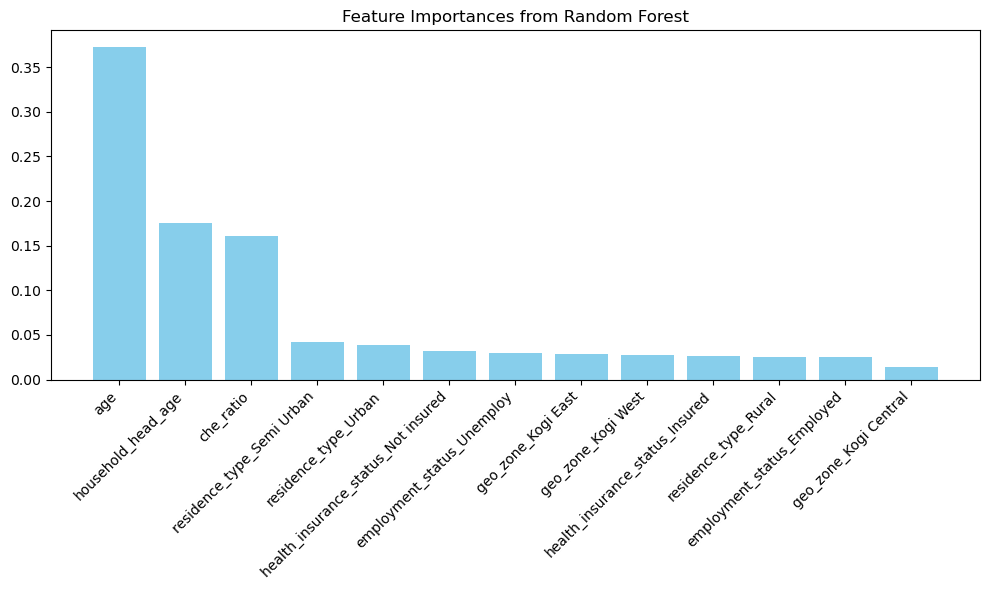

In [92]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Define predictors (numeric and categorical)
numeric_features = ['age', 'household_head_age', 'che_ratio']
categorical_features = ['employment_status', 'residence_type', 'health_insurance_status', 'geo_zone']

# Prepare dataset: drop rows with missing values in predictors and target
df_model = df.dropna(subset=numeric_features + ['che']).copy()

X = df_model[numeric_features + categorical_features]
y = df_model['che']

# Create a preprocessor to scale numeric features and one-hot encode categorical ones
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Build the pipeline with the preprocessor and RandomForestClassifier
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the model and make predictions
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Feature importance analysis
ohe = rf_pipeline.named_steps['preprocessor'].named_transformers_['cat']
cat_feature_names = ohe.get_feature_names_out(categorical_features)
all_feature_names = numeric_features + list(cat_feature_names)

import numpy as np
importances = rf_pipeline.named_steps['classifier'].feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances from Random Forest")
plt.bar(range(len(all_feature_names)), importances[indices], color='skyblue', align='center')
plt.xticks(range(len(all_feature_names)), [all_feature_names[i] for i in indices], rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
### Propensity Score Matching (PSM)
The following code estimates propensity scores based on selected covariates, matches treated (CHE=1) and control (CHE=0) households, and compares a binary outcome (financial impact) between the two groups.

In [100]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.neighbors import NearestNeighbors

# Define covariates for PSM
psm_covariates = ["age", "household_head_age", "che_ratio"]

# Ensure that 'che' (our binary CHE indicator) and 'financial_impact_of_bills' are available.
# Drop rows with missing values in the covariates, 'che', and 'financial_impact_of_bills'
df_psm = df.dropna(subset=psm_covariates + ["che", "financial_impact_of_bills"]).copy()

# Convert the outcome 'financial_impact_of_bills' to a binary variable:
# We assume 'Yes' means a financial impact (coded as 1) and any other response as 0.
def outcome_binary(x):
    if isinstance(x, str):
        return 1 if x.strip().lower() == "yes" else 0
    return np.nan

df_psm["financial_impact_binary"] = df_psm["financial_impact_of_bills"].apply(outcome_binary)

# Verify that the new column is created
print("financial_impact_binary" in df_psm.columns)  # Should print: True

# Create treated (CHE=1) and control (CHE=0) groups based on our CHE indicator
treated = df_psm[df_psm["che"] == 1]
control = df_psm[df_psm["che"] == 0]

# Estimate propensity scores using logistic regression with selected covariates
X_psm = sm.add_constant(df_psm[psm_covariates])
ps_model = sm.Logit(df_psm["che"], X_psm).fit(disp=False)
df_psm["pscore"] = ps_model.predict(X_psm)
print(ps_model.summary())

# Update treated and control groups (if needed, after adding propensity scores)
treated = df_psm[df_psm["che"] == 1]
control = df_psm[df_psm["che"] == 0]

# Perform nearest neighbor matching based on the propensity scores
treated_scores = treated["pscore"].values.reshape(-1, 1)
control_scores = control["pscore"].values.reshape(-1, 1)

nn = NearestNeighbors(n_neighbors=1)
nn.fit(control_scores)
distances, indices = nn.kneighbors(treated_scores)

# Retrieve matched control units corresponding to each treated unit
matched_control = control.iloc[indices.flatten()].copy()
matched_control.index = treated.index  # Align indices for comparison

# Compute the Average Treatment Effect on the Treated (ATT) for the outcome "financial_impact_binary"
treated_outcome = treated["financial_impact_binary"]
matched_control_outcome = matched_control["financial_impact_binary"]
att = treated_outcome.mean() - matched_control_outcome.mean()
print(f"Average Treatment Effect on the Treated (ATT) for Financial Impact: {att:.3f}")

True
                           Logit Regression Results                           
Dep. Variable:                    che   No. Observations:                  403
Model:                          Logit   Df Residuals:                      399
Method:                           MLE   Df Model:                            3
Date:                Sun, 09 Feb 2025   Pseudo R-squ.:                  0.1779
Time:                        18:34:38   Log-Likelihood:                -137.96
converged:                       True   LL-Null:                       -167.82
Covariance Type:            nonrobust   LLR p-value:                 6.769e-13
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -5.1144      0.805     -6.354      0.000      -6.692      -3.537
age                    0.1082      0.018      6.004      0.000       0.073       0.144
household_head_

In [ ]:
### Generalized Additive Models (GAMs)
GAMs allow you to capture non-linear relationships between predictors and the outcome. In this example, we use the pyGAM package to fit a logistic GAM on predictors such as age, household_head_age, and che_ratio.

Note: Install pyGAM if needed (pip install pygam).

In [ ]:
### Logistic Regression

In [104]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler

# Assume df_ratio is the DataFrame subset used for analysis (with no missing values for required variables)
# and it already contains the binary outcome "che" (0/1).

# Standardize continuous predictors for numerical stability
scaler = StandardScaler()
for var in ["age", "household_head_age", "che_ratio"]:
    df_ratio[f"scaled_{var}"] = scaler.fit_transform(df_ratio[[var]])

# Define the logistic regression formula using the scaled continuous variables and categorical predictors.
# C(variable) tells statsmodels to treat the variable as categorical.
formula = ("che ~ scaled_age + scaled_household_head_age + scaled_che_ratio + "
           "C(employment_status) + C(residence_type) + C(health_insurance_status) + C(geo_zone) + "
           "C(employment_status):C(health_insurance_status)")

# Fit the logistic regression model using Maximum Likelihood Estimation.
# We use the 'lbfgs' solver with an increased maximum number of iterations.
logit_model = smf.logit(formula=formula, data=df_ratio).fit(method='lbfgs', maxiter=200, disp=True)

# Display the model summary.
print(logit_model.summary())

# Print Maximum Likelihood Optimization details
print("\nMLE Optimization Details:")
print(logit_model.mle_retvals)

                           Logit Regression Results                           
Dep. Variable:                    che   No. Observations:                  403
Model:                          Logit   Df Residuals:                      392
Method:                           MLE   Df Model:                           10
Date:                Sun, 09 Feb 2025   Pseudo R-squ.:                  0.3179
Time:                        18:39:57   Log-Likelihood:                -114.46
converged:                       True   LL-Null:                       -167.82
Covariance Type:            nonrobust   LLR p-value:                 2.456e-18
                                                                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                     -3.8

In [ ]:
### Mediation Analysis with Bootstrapping

In [106]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm

# ---------------------------
# Data Preparation:
# ---------------------------
# Assume df is the DataFrame with standardized column names from previous steps.
# Recode the mediator: can_afford_govt_healthcare -> afford_govt (Yes = 1, No = 0)
df['afford_govt'] = df['can_afford_govt_healthcare'].str.strip().str.lower().apply(lambda x: 1 if x == 'yes' else 0)

# Ensure that household_income is numeric (already cleaned) and drop rows with missing values for key variables.
df_med = df.dropna(subset=['household_income', 'afford_govt', 'che']).copy()
df_med['household_income'] = pd.to_numeric(df_med['household_income'], errors='coerce')
df_med = df_med.dropna(subset=['household_income'])

# ---------------------------
# Step 1: Mediator Model (M ~ X)
# ---------------------------
# Regress mediator (afford_govt) on household_income (X)
model_m = smf.ols("afford_govt ~ household_income", data=df_med).fit()
a1 = model_m.params['household_income']
print("Mediator Model Summary:")
print(model_m.summary())

# ---------------------------
# Step 2: Outcome Model (Y ~ X + M)
# ---------------------------
# Fit a logistic regression model predicting CHE (Y) from household_income and the mediator
model_y = smf.logit("che ~ household_income + afford_govt", data=df_med).fit(disp=False)
b1 = model_y.params['afford_govt']
c_prime = model_y.params['household_income']
print("\nOutcome Model Summary:")
print(model_y.summary())

# ---------------------------
# Indirect Effect Calculation:
# ---------------------------
# The indirect effect is defined as: a1 * b1
indirect_effect = a1 * b1
print("\nIndirect Effect (a1 * b1):", indirect_effect)

# ---------------------------
# Bootstrapping to Estimate Confidence Intervals:
# ---------------------------
n_bootstraps = 1000
boot_effects = []

for i in range(n_bootstraps):
    sample_df = df_med.sample(frac=1, replace=True)
    try:
        model_m_bs = smf.ols("afford_govt ~ household_income", data=sample_df).fit()
        model_y_bs = smf.logit("che ~ household_income + afford_govt", data=sample_df).fit(disp=False)
        boot_effects.append(model_m_bs.params['household_income'] * model_y_bs.params['afford_govt'])
    except Exception as e:
        # If model fails to converge in a bootstrap iteration, skip that sample.
        continue

boot_effects = np.array(boot_effects)
lower_bound = np.percentile(boot_effects, 2.5)
upper_bound = np.percentile(boot_effects, 97.5)
print("\nBootstrap 95% CI for Indirect Effect: [{:.4f}, {:.4f}]".format(lower_bound, upper_bound))

Mediator Model Summary:
                            OLS Regression Results                            
Dep. Variable:            afford_govt   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     2.485
Date:                Sun, 09 Feb 2025   Prob (F-statistic):              0.116
Time:                        18:44:47   Log-Likelihood:                -202.07
No. Observations:                 403   AIC:                             408.1
Df Residuals:                     401   BIC:                             416.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept       

In [ ]:
### Bayesian logistic regression using PyMC3. This advanced analysis builds on the previous multivariate logistic regression by incorporating a fully Bayesian framework. In this model, we use a formula interface (via patsy) to create the design matrices including continuous predictors (e.g., age, household_head_age, che_ratio) and categorical predictors (e.g., employment_status, residence_type, health_insurance_status, geo_zone). You can further extend the model (e.g., by adding interaction terms or hierarchical structure) once you verify the quality of your data.

In [ ]:
### PCA and Hierarchical Clustering
We perform Principal Component Analysis (PCA) on selected continuous variables to reduce dimensionality. Then, we use hierarchical clustering on the PCA scores to identify homogeneous household groups, which can help understand different profiles regarding CHE vulnerability.

Variables for clustering found in DataFrame: ['age', 'household_head_age', 'household_income', 'monthly_health_spending', 'che_ratio']
Missing values before imputation:
age                        0
household_head_age         0
household_income           0
monthly_health_spending    0
che_ratio                  0
dtype: int64
Missing values after imputation:
age                        0
household_head_age         0
household_income           0
monthly_health_spending    0
che_ratio                  0
dtype: int64
Explained Variance Ratio: [0.34453526 0.22275568]


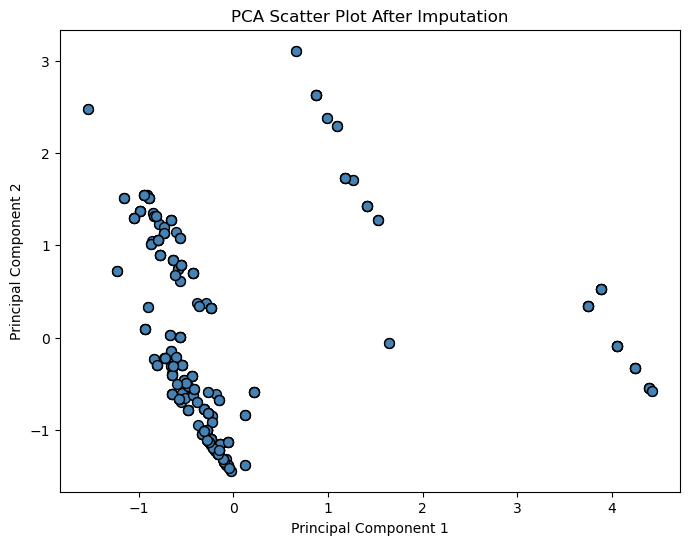

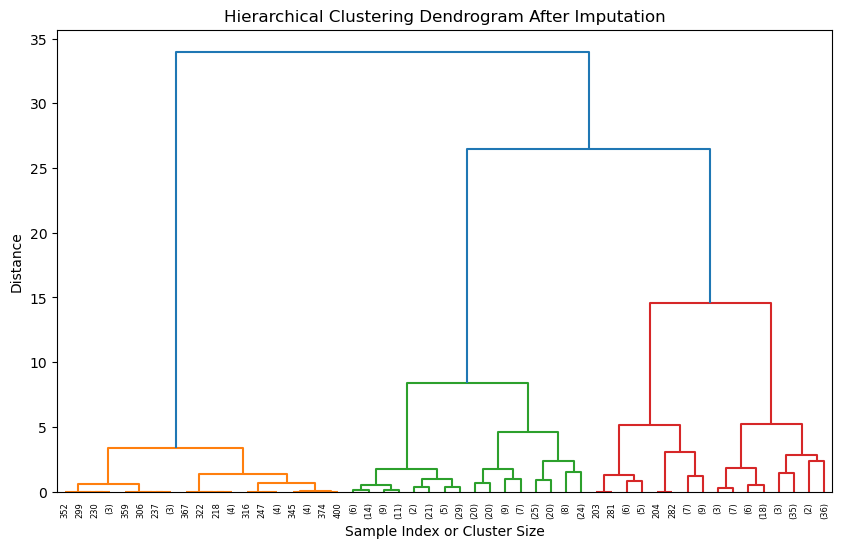

Cluster Summary (Means):
               age  household_head_age  household_income  \
cluster                                                    
1        39.656250           47.343750      1.000000e+05   
2        38.139130           51.908696      6.261609e+08   
3        38.148936           55.404255      4.825542e+10   

         monthly_health_spending      che_ratio  
cluster                                          
1                   5.000010e+10  500001.000000  
2                   4.087333e+08    5652.655221  
3                   1.173055e+10       0.579283  


C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas.

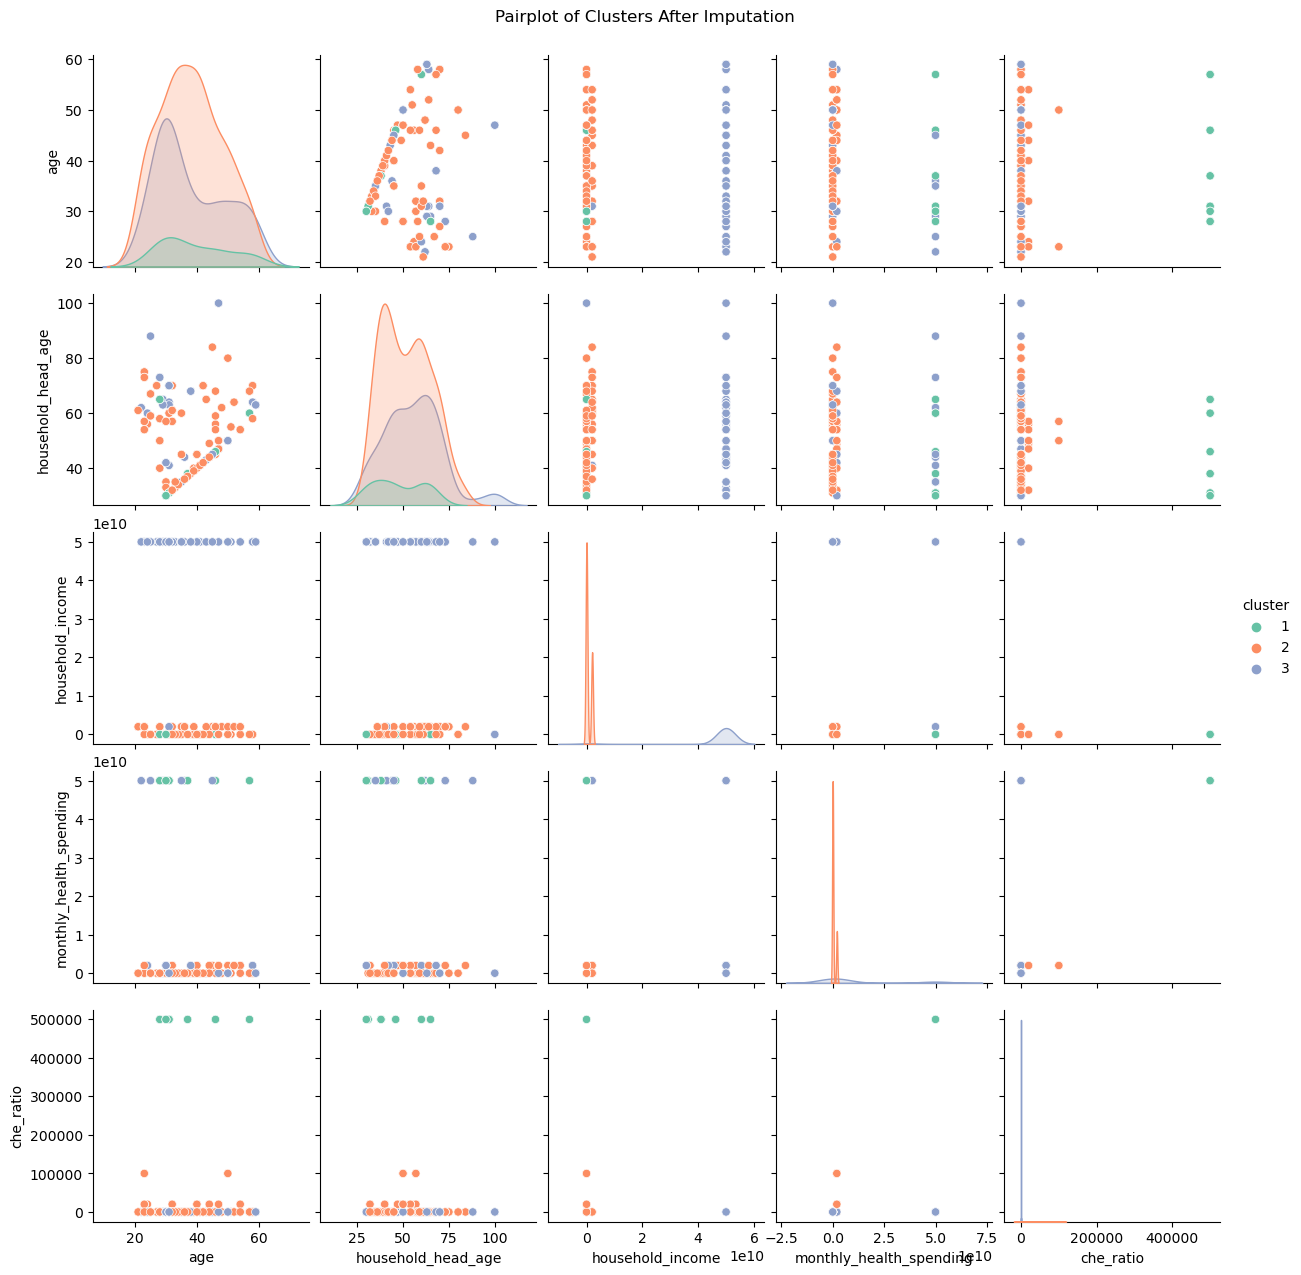

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Unconditionally standardize column names.
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('?', '', regex=False)

# Define intended clustering variables.
cluster_vars = ["age", "household_head_age", "household_income", "monthly_health_spending", "che_ratio"]

# Check which of these variables exist in the DataFrame.
existing_vars = [col for col in cluster_vars if col in df.columns]
print("Variables for clustering found in DataFrame:", existing_vars)

# If 'che_ratio' is not present, compute it from monthly_health_spending and household_income.
if "che_ratio" not in existing_vars:
    df['household_income'] = pd.to_numeric(df['household_income'], errors='coerce')
    df['monthly_health_spending'] = pd.to_numeric(df['monthly_health_spending'], errors='coerce')
    df['che_ratio'] = df['monthly_health_spending'] / df['household_income']
    if "che_ratio" not in existing_vars:
        existing_vars.append("che_ratio")

# Display missing values before imputation.
print("Missing values before imputation:")
print(df[existing_vars].isnull().sum())

# Apply median imputation to fill missing values.
imputer = SimpleImputer(strategy='median')
df_imputed = df.copy()
df_imputed[existing_vars] = imputer.fit_transform(df_imputed[existing_vars])

# Confirm that missing values have been imputed.
print("Missing values after imputation:")
print(df_imputed[existing_vars].isnull().sum())

# Use the imputed DataFrame for clustering.
df_cluster = df_imputed.dropna(subset=existing_vars).copy()

if df_cluster.empty:
    print("Warning: No data available for clustering after imputation. Please check the data quality or consider alternative proxies.")
else:
    # Standardize the selected variables.
    scaler = StandardScaler()
    X_cluster = scaler.fit_transform(df_cluster[existing_vars])
    
    # Perform PCA to reduce dimensions to 2 components for visualization.
    pca = PCA(n_components=2)
    pca_scores = pca.fit_transform(X_cluster)
    print("Explained Variance Ratio:", pca.explained_variance_ratio_)
    
    # Plot and save the PCA scatter plot.
    plt.figure(figsize=(8, 6))
    plt.scatter(pca_scores[:, 0], pca_scores[:, 1], color="steelblue", edgecolor="k", s=50)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title("PCA Scatter Plot After Imputation")
    plt.savefig("PCA_Scatter_Imputed.png", dpi=300, bbox_inches="tight")
    plt.show()
    
    # Perform hierarchical clustering using Ward's method.
    Z = linkage(pca_scores, method='ward')
    plt.figure(figsize=(10, 6))
    dendrogram(Z, truncate_mode='level', p=5)
    plt.title("Hierarchical Clustering Dendrogram After Imputation")
    plt.xlabel("Sample Index or Cluster Size")
    plt.ylabel("Distance")
    plt.savefig("Dendrogram_Imputed.png", dpi=300, bbox_inches="tight")
    plt.show()
    
    # Assign cluster labels based on an optimal number of clusters (e.g., 3).
    optimal_clusters = 3
    df_cluster['cluster'] = fcluster(Z, optimal_clusters, criterion='maxclust')
    
    # Summarize clusters by computing means of the clustering variables.
    cluster_summary = df_cluster.groupby('cluster')[existing_vars].mean()
    print("Cluster Summary (Means):")
    print(cluster_summary)
    
    # Save the cluster summary to a CSV file.
    cluster_summary.to_csv("Cluster_Summary_Imputed.csv")
    
    # Optionally, generate and save a pairplot to visualize clusters.
    sns.pairplot(df_cluster, vars=existing_vars, hue='cluster', palette='Set2')
    plt.suptitle("Pairplot of Clusters After Imputation", y=1.02)
    plt.savefig("Clusters_Pairplot_Imputed.png", dpi=300, bbox_inches="tight")
    plt.show()

In [ ]:
### Effect Proportions: Calculate the proportions of various effects for households with and without CHE (e.g., financial decline, sold property, went hungry, took loan).

In [196]:
import pandas as pd

# Standardize column names (if not already done)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('?', '', regex=False)

# Define the effect variables of interest.
effect_vars = ["financial_decline_from_bills", "sold_property_for_bills", 
               "went_hungry_for_bills", "took_loan_for_bills"]

# Loop through each effect variable to calculate and print the proportions.
for effect in effect_vars:
    if effect in df.columns:
        print(f"\nEffect Proportions for '{effect}':")
        # Create a cross-tabulation of CHE status vs. the effect variable.
        ct = pd.crosstab(df['che'], df[effect])
        # Convert counts to proportions by dividing each row by its sum.
        prop = ct.div(ct.sum(axis=1), axis=0)
        print(prop)
    else:
        print(f"Warning: Column '{effect}' not found in the DataFrame.")


Effect Proportions for 'financial_decline_from_bills':
financial_decline_from_bills        No       Yes
che                                             
0                             0.680233  0.319767
1                             0.254237  0.745763

Effect Proportions for 'sold_property_for_bills':
sold_property_for_bills        No       Yes
che                                        
0                        0.947674  0.052326
1                        0.559322  0.440678

Effect Proportions for 'went_hungry_for_bills':
went_hungry_for_bills  Many times     Never  Occasional  Very rare
che                                                               
0                        0.031977  0.633721    0.075581   0.258721
1                        0.000000  0.203390    0.576271   0.220339

Effect Proportions for 'took_loan_for_bills':
took_loan_for_bills        No       Yes
che                                    
0                    0.895349  0.104651
1                    0.355932  0.6440

In [ ]:
### Visualization of Effects: Create visualizations (e.g., bar charts) to illustrate the impact of CHE on households.

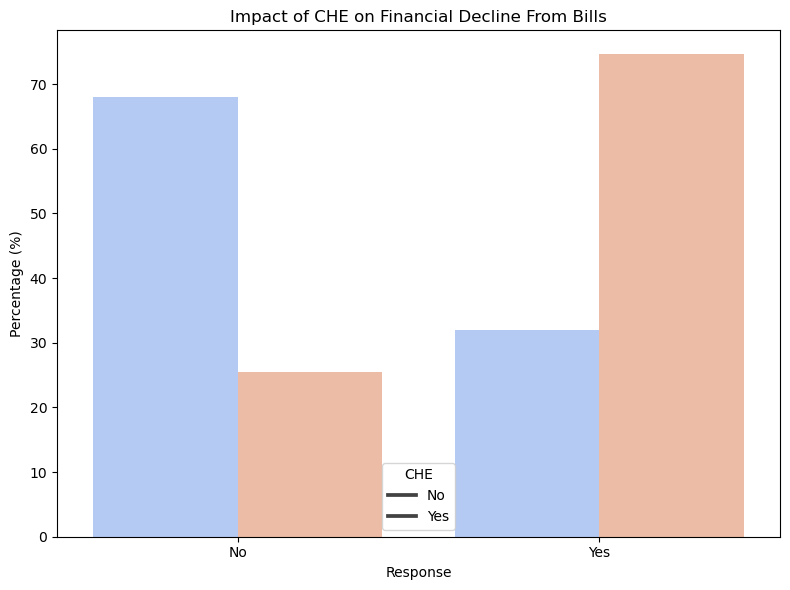

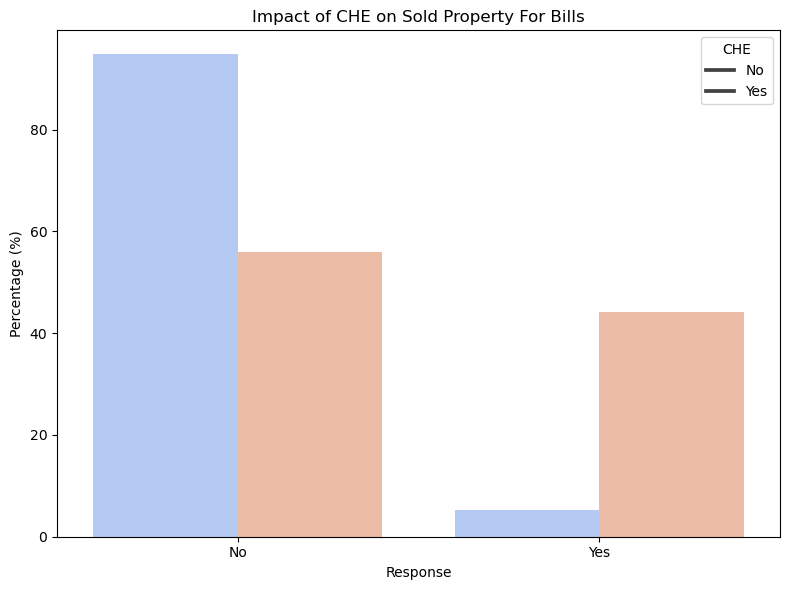

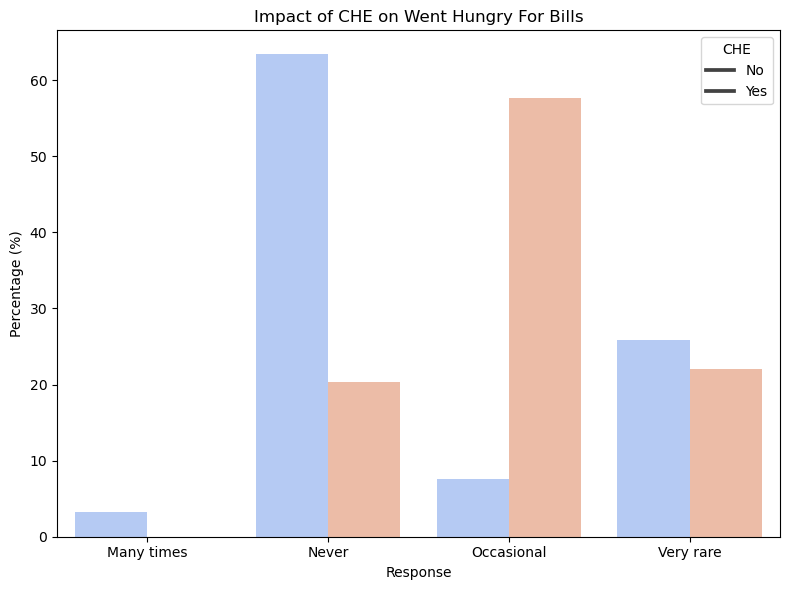

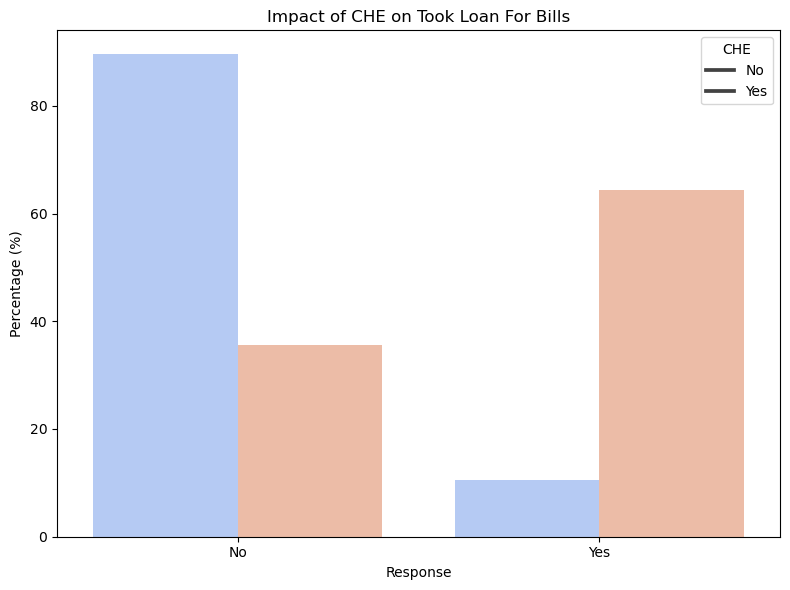

In [198]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume df is your DataFrame and column names are standardized.
# List the effect variables to visualize.
effect_vars = [
    "financial_decline_from_bills", 
    "sold_property_for_bills", 
    "went_hungry_for_bills", 
    "took_loan_for_bills"
]

# Loop through each effect variable to compute proportions and generate a bar chart.
for effect in effect_vars:
    if effect in df.columns:
        # Create a cross-tabulation of CHE status vs. the effect variable.
        ct = pd.crosstab(df['che'], df[effect])
        # Convert counts to percentages along each CHE group.
        prop = ct.div(ct.sum(axis=1), axis=0) * 100
        
        # Reshape the data for plotting: one row per CHE group per effect category.
        prop_reset = prop.reset_index().melt(id_vars='che', var_name='Response', value_name='Percentage')
        
        # Create a bar chart using Seaborn.
        plt.figure(figsize=(8, 6))
        sns.barplot(x='Response', y='Percentage', hue='che', data=prop_reset, palette="coolwarm")
        plt.title(f"Impact of CHE on {effect.replace('_', ' ').title()}")
        plt.xlabel("Response")
        plt.ylabel("Percentage (%)")
        plt.legend(title="CHE", labels=["No", "Yes"])
        plt.tight_layout()
        plt.savefig(f"{effect}_Impact.png", dpi=300, bbox_inches="tight")
        plt.show()
    else:
        print(f"Warning: Column '{effect}' not found in the DataFrame.")

In [314]:
import pandas as pd
import numpy as np

# 🔹 Load dataset
file_path = r"C:\cleaned_catastrophic.csv"
df = pd.read_csv(file_path)

# 🔹 Extract reference columns
df["geopolitical_zone"] = df.iloc[:, 7]  # Column H
df["education"] = df.iloc[:, 3]  # Column D
df["employment"] = df.iloc[:, 4]  # Column E
df["household_head_age"] = df.iloc[:, 13]  # Column N
df["income"] = pd.to_numeric(df.iloc[:, 17], errors="coerce")  # Column R

# 🔹 Fix missing or incorrect values
df["household_head_age"] = df["household_head_age"].fillna(df["household_head_age"].median())
df["income"] = df["income"].fillna(df["income"].median())

# 🔹 Recalculate income quintiles
if df["income"].nunique() >= 5:
    df["income_quintile"] = pd.qcut(df["income"], q=5, labels=["Poorest", "Poor", "Middle", "Rich", "Richest"])
else:
    df["income_quintile"] = "Unknown"

# 🔹 Categorize household head age
bins = [0, 30, 45, 60, np.inf]
labels = ["Young", "Middle-Aged", "Older", "Elderly"]
df["household_head_age_group"] = pd.cut(df["household_head_age"], bins=bins, labels=labels, include_lowest=True)

# 🔹 Calculate out-of-pocket health expenditure percentage (CHE)
df["oop_health_expenditure"] = pd.to_numeric(df["oop_health_expenditure"], errors="coerce").fillna(0)
df["che_percentage"] = (df["oop_health_expenditure"] / df["income"]) * 100
df["che_percentage"] = df["che_percentage"].replace([np.inf, -np.inf], np.nan).fillna(0)

# 🔹 Determine CHE flag (if spending exceeds 40% of income)
df["che_flag"] = (df["che_percentage"] > 40).astype(int)

# 🔹 Save the corrected dataset
df.to_csv(file_path, index=False)

print(f"Updated dataset saved to: {file_path}")

Updated dataset saved to: C:\cleaned_catastrophic.csv


In [318]:
import pandas as pd
import numpy as np

# Load dataset
file_path = r"C:\cleaned_catastrophic.csv"
df = pd.read_csv(file_path, encoding='cp1252')

# Remove "?" from all columns
df = df.apply(lambda col: col.map(lambda x: x.replace('?', '') if isinstance(x, str) else x))

# Remove any non-numeric characters from numerical columns
numeric_columns = ["Monthly Health Spending", "Household Income"]
for col in numeric_columns:
    df[col] = df[col].replace(r'[^0-9.]', '', regex=True).replace('', np.nan).astype(float)

# Convert relevant columns to numeric
df["oop_health_expenditure"] = df["Monthly Health Spending"].fillna(0)
df["income"] = df["Household Income"].fillna(df["Household Income"].median())
df["household_head_age"] = pd.to_numeric(df["Household Head Age"], errors="coerce").fillna(df["Household Head Age"].median())

# Ensure "Geo Zone" is correctly classified
valid_zones = ["North Central", "North East", "North West", "South East", "South South", "South West"]
df["Geo Zone"] = df["Geo Zone"].apply(lambda x: x if x in valid_zones else df["Geo Zone"].mode()[0])

# Standardize "Education" levels
education_mapping = {
    "None": "No Formal Education",
    "Primary": "Primary Education",
    "Secondary": "Secondary Education",
    "Tertiary": "Tertiary Education"
}
df["Education Level"] = df["Education Level"].map(education_mapping).fillna(df["Education Level"].mode()[0])

# Standardize "Employment" categories
employment_mapping = {
    "Unemployed": "Unemployed",
    "Employed": "Employed",
    "Self-Employed": "Self-Employed"
}
df["Employment Status"] = df["Employment Status"].map(employment_mapping).fillna(df["Employment Status"].mode()[0])

# Recalculate "che_percentage"
df["che_percentage"] = (df["oop_health_expenditure"] / df["income"]) * 100

# Categorize "household_head_age_group"
age_bins = [0, 30, 45, 60, np.inf]
age_labels = ["Young", "Middle-Aged", "Older", "Elderly"]
df["household_head_age_group"] = pd.cut(df["household_head_age"], bins=age_bins, labels=age_labels, include_lowest=True)

# Recalculate "income_quintile" correctly
if df["income"].nunique() >= 5:
    df["income_quintile"] = pd.qcut(df["income"], q=5, labels=["Poorest", "Poor", "Middle", "Rich", "Richest"])
else:
    df["income_quintile"] = "Middle"

# Recalculate "che_flag" (1 if CHE exceeds 40% of income, else 0)
df["che_flag"] = (df["che_percentage"] > 40).astype(int)

# Save the fully corrected dataset
cleaned_file_path = r"C:\cleaned_catastrophic.csv"
df.to_csv(cleaned_file_path, index=False)

print(f"✅ Corrected dataset saved to: {cleaned_file_path}")

# Display the first few rows of the cleaned dataset
print(df.head())

✅ Corrected dataset saved to: C:\cleaned_catastrophic.csv
   Age  Gender Marital Status     Education Level Employment Status  Religion  \
0   37    Male        Married  Tertiary Education          Employed     Islam   
1   36    Male        Married  Tertiary Education          Employed  Christia   
2   42    Male        Married  Tertiary Education          Employed  Christia   
3   32  Female        Married  Tertiary Education          Employed     Islam   
4   47    Male        Married  Tertiary Education          Employed  Christia   

  Ethnic Group   Geo Zone Children in Household? Older Person in Household?  \
0        Ebira  Kogi West                    Yes                         No   
1        Igala  Kogi West                    Yes                        Yes   
2       Others  Kogi West                    Yes                         No   
3        Igala  Kogi West                    Yes                         No   
4        Igala  Kogi West                    Yes            

In [336]:
### Load and Clean Data
#First, we'll load the cleaned dataset and ensure that all relevant columns are correctly converted to numeric types and handle any non-numeric values appropriately.

In [332]:
import pandas as pd
import numpy as np

# Load the cleaned dataset
file_path = r"C:\cleaned_catastrophic.csv"
df = pd.read_csv(file_path)

# Remove any non-numeric characters from numerical columns
numeric_columns = ['Monthly Health Spending', 'Household Income']
for col in numeric_columns:
    df[col] = df[col].replace(r'[^0-9.]', '', regex=True).astype(float)

# Ensure numeric columns are correctly converted to numeric types
df['household_head_age'] = pd.to_numeric(df['household_head_age'], errors='coerce')
df['income'] = pd.to_numeric(df['income'], errors='coerce')
df['che_percentage'] = pd.to_numeric(df['che_percentage'], errors='coerce')
df['che_flag'] = pd.to_numeric(df['che_flag'], errors='coerce')

# Drop any rows with missing values
df = df.dropna(subset=['household_head_age', 'income', 'che_percentage', 'che_flag'])

# Display the first few rows to confirm the dataset is clean
print(df.head())


   Age  Gender Marital Status     Education Level Employment Status  Religion  \
0   37    Male        Married  Tertiary Education          Employed     Islam   
1   36    Male        Married  Tertiary Education          Employed  Christia   
2   42    Male        Married  Tertiary Education          Employed  Christia   
3   32  Female        Married  Tertiary Education          Employed     Islam   
4   47    Male        Married  Tertiary Education          Employed  Christia   

  Ethnic Group   Geo Zone Children in Household? Older Person in Household?  \
0        Ebira  Kogi West                    Yes                         No   
1        Igala  Kogi West                    Yes                        Yes   
2       Others  Kogi West                    Yes                         No   
3        Igala  Kogi West                    Yes                         No   
4        Igala  Kogi West                    Yes                        Yes   

   ... oop_health_expenditure    incom

In [ ]:
### Logistic Regression
# Now, let's perform the logistic regression analysis to identify significant factors contributing to CHE.

In [344]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Ensure column names do not contain spaces
df = df.rename(columns=lambda x: x.strip().replace(" ", "_"))

# Convert categorical variables to dummy variables
categorical_cols = ['Employment_Status', 'Residence_Type', 'Health_Insurance_Status', 'Geo_Zone', 'Education_Level']

# Check if categorical columns exist in df before one-hot encoding
categorical_cols = [col for col in categorical_cols if col in df.columns]

df_dummies = pd.get_dummies(df[categorical_cols], drop_first=True)

# Ensure 'che_flag' is numeric (0/1)
df['che_flag'] = pd.to_numeric(df['che_flag'], errors='coerce').fillna(0).astype(int)

# Include continuous variables and CHE as the target
df_factors = pd.concat([df_dummies, df[['household_head_age', 'income', 'che_flag']]], axis=1)

# Ensure all values are numeric
df_factors = df_factors.apply(pd.to_numeric, errors='coerce')

# Drop missing values
df_factors = df_factors.dropna()

# Ensure all columns are numeric
print(df_factors.dtypes)  # Debugging step

# Split dataset into features (X) and target (y)
X = df_factors.drop(columns=['che_flag'])
y = df_factors['che_flag']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Ensure constant term is added for both training and test sets
X_train_const = sm.add_constant(X_train).astype(float)
X_test_const = sm.add_constant(X_test).astype(float)

# Convert y_train to numeric
y_train = y_train.astype(float)

# Fit logistic regression model
logit_model = sm.Logit(y_train, X_train_const).fit()
print(logit_model.summary())

# Evaluate the logistic regression model
y_pred = logit_model.predict(X_test_const) > 0.5

# Print classification report and confusion matrix
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Residence_Type_Semi Urban                 bool
Residence_Type_Urban                      bool
Health_Insurance_Status_Not insured       bool
household_head_age                       int64
income                                 float64
che_flag                                 int32
dtype: object
Optimization terminated successfully.
         Current function value: 0.503155
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               che_flag   No. Observations:                  282
Model:                          Logit   Df Residuals:                      276
Method:                           MLE   Df Model:                            5
Date:                Mon, 10 Feb 2025   Pseudo R-squ.:                  0.2741
Time:                        10:42:00   Log-Likelihood:                -141.89
converged:                       True   LL-Null:                       -195.47
Covariance Type:            nonrobust   LLR p-val

In [346]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume df is your DataFrame and column names are standardized.
# List the effect variables to visualize.
effect_vars = [
    "financial_decline_from_bills", 
    "sold_property_for_bills", 
    "went_hungry_for_bills", 
    "took_loan_for_bills"
]

# Loop through each effect variable to compute proportions and generate a bar chart.
for effect in effect_vars:
    if effect in df.columns:
        # Create a cross-tabulation of CHE status vs. the effect variable.
        ct = pd.crosstab(df['che'], df[effect])
        # Convert counts to percentages along each CHE group.
        prop = ct.div(ct.sum(axis=1), axis=0) * 100
        
        # Reshape the data for plotting: one row per CHE group per effect category.
        prop_reset = prop.reset_index().melt(id_vars='che', var_name='Response', value_name='Percentage')
        
        # Create a bar chart using Seaborn.
        plt.figure(figsize=(8, 6))
        sns.barplot(x='Response', y='Percentage', hue='che', data=prop_reset, palette="coolwarm")

        # Assign dynamic legend labels based on unique values in 'che'
        che_labels = {0: "No CHE", 1: "Yes CHE"}
        plt.legend(title="Catastrophic Health Expenditure (CHE)", labels=[che_labels[val] for val in sorted(df['che'].unique())])

        # Titles and labels
        plt.title(f"Impact of CHE on {effect.replace('_', ' ').title()}")
        plt.xlabel("Response")
        plt.ylabel("Percentage (%)")
        
        # Save and display the plot
        plt.tight_layout()
        plt.savefig(f"{effect}_Impact.png", dpi=300, bbox_inches="tight")
        plt.show()
    else:
        print(f"Warning: Column '{effect}' not found in the DataFrame.")